## **LAB - 6** ##

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px


In [32]:
iris = load_iris()
X = iris.data
y = iris.target

In [33]:
y_binary = np.where(y == 2, 1, 0)

In [34]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Species'] = y_binary
EDA = iris_df.groupby('Species').describe()
EDA.head()

sepal length (cm)                                               
                    count   mean       std  min    25%  50%  75%  max   
Species                                                                 
0                   100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
1                    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

        sepal width (cm)         ... petal length (cm)      petal width (cm)   
                   count   mean  ...               75%  max            count   
Species                          ...                                           
0                  100.0  3.099  ...             4.325  5.1            100.0  \
1                   50.0  2.974  ...             5.875  6.9             50.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Species                                            
0        0.786  0.565153  0.1  0.2  0.8  1.3  1.8  
1        2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

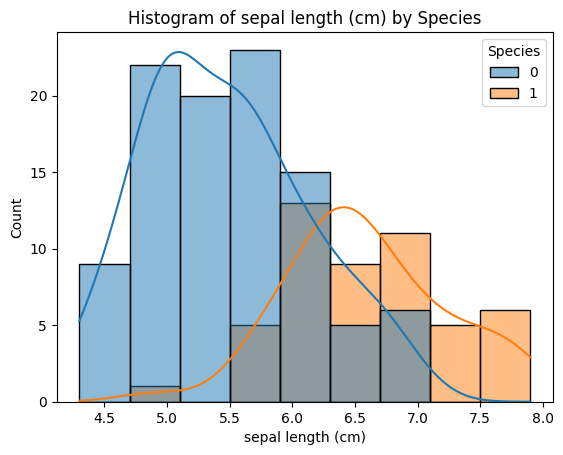

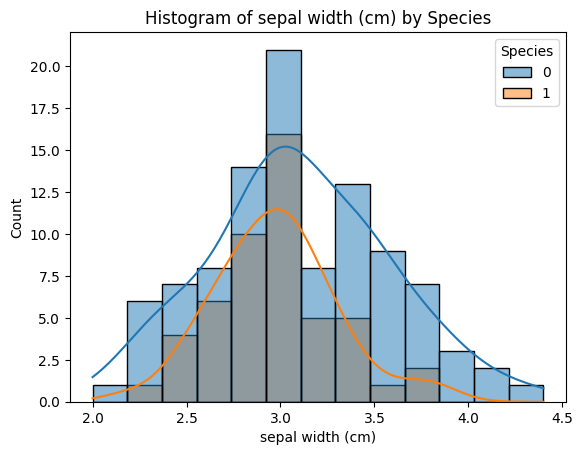

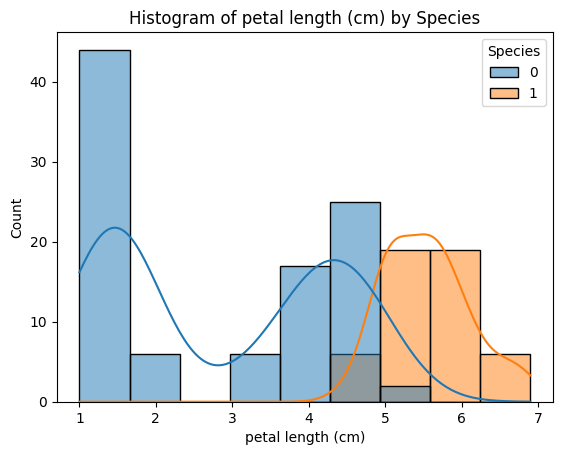

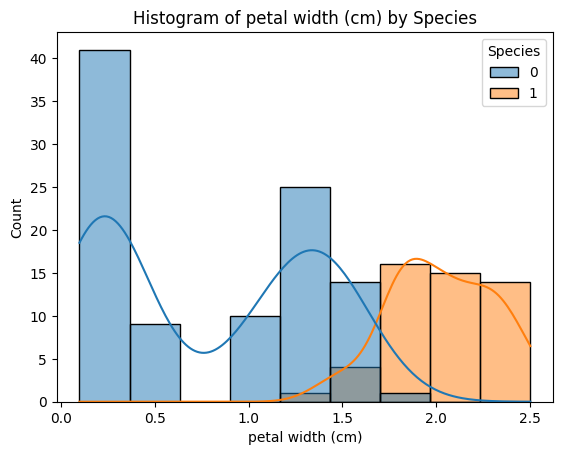

In [35]:
for feature in iris.feature_names:
    sns.histplot(data=iris_df, x=feature, hue='Species', kde=True)
    plt.title(f'Histogram of {feature} by Species')
    plt.show()

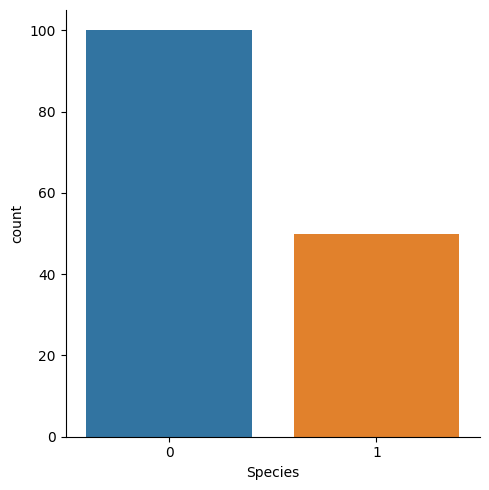

In [36]:
sns.catplot(data=iris_df, x='Species', kind='count')


https://www.kaggle.com/code/rajmehra03/the-iris-species-dataset

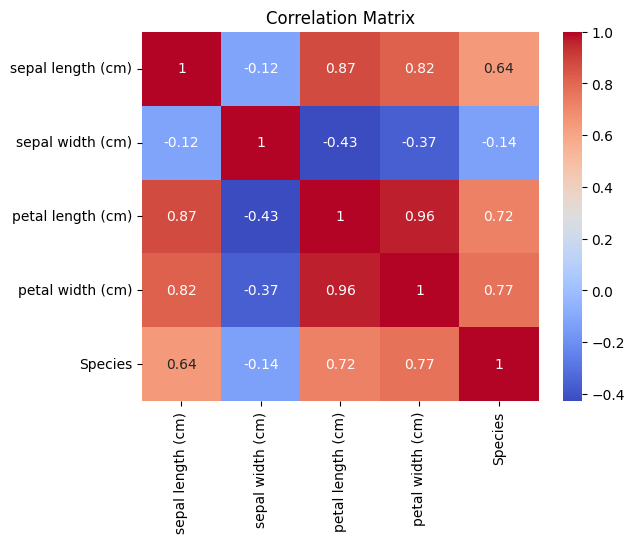

In [37]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Test Data**

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=15, random_state=42)

In [39]:
def plot_decision_boundary(X, y, model, feature_names):
    h = .02 
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision Boundary")


In [40]:
feature_order = list(combinations(range(4), 1)) + \
                  list(combinations(range(4), 2)) + \
                  list(combinations(range(4), 3)) + \
                  [(0, 1, 2, 3)]  # All features
np.random.shuffle(feature_order)

models = []
for order in feature_order:
    model = LogisticRegression()
    model.fit(X_train[:, order], y_train)
    models.append((model, order))

In [41]:
for model, order in models:
    predictions = model.predict(X_val[:, order])
    probabilities = model.predict_proba(X_val[:, order])[:, 1]
    evaluation_table = pd.DataFrame({'Instance Number': range(1, len(predictions) + 1),
                                     'Probability of predicting virginica': probabilities,
                                     'Predicted': predictions,
                                     'Ground Truth': y_val})
    print("Model with features:", order)
    print(evaluation_table)
    accuracy = accuracy_score(y_val, predictions)
    print(f"Accuracy: {accuracy}")
    print()

Model with features: (2, 3)
    Instance Number  Probability of predicting virginica  Predicted   
0                 1                             0.000014          0  \
1                 2                             0.000015          0   
2                 3                             0.998655          1   
3                 4                             0.897028          1   
4                 5                             0.210752          0   
5                 6                             0.585651          1   
6                 7                             0.936985          1   
7                 8                             0.150068          0   
8                 9                             0.000009          0   
9                10                             0.000009          0   
10               11                             0.870248          1   
11               12                             0.782899          1   
12               13                             0

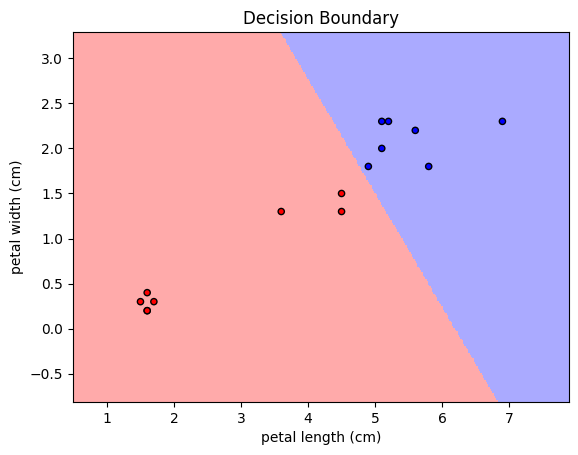

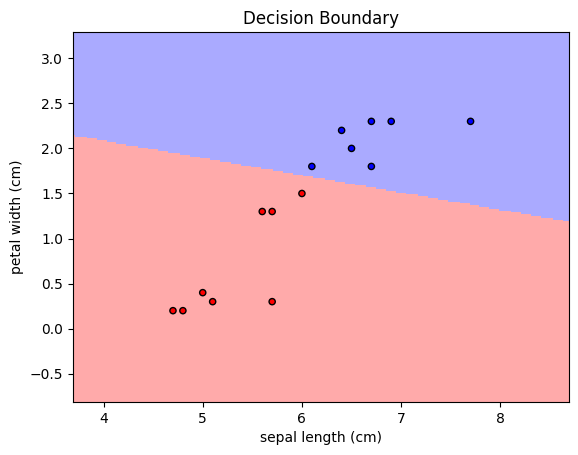

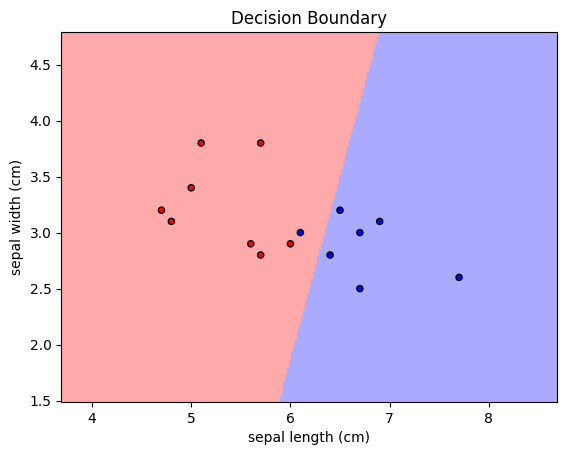

In [42]:
for i in range(3):
    model, order = models[i]
    if len(order) == 2:
        feature_names = [iris.feature_names[order[0]], iris.feature_names[order[1]]]
        plot_decision_boundary(X_val[:, order], y_val, model, feature_names)
        plt.show()

In [43]:
for model, order in models:
    predictions = model.predict(X_val[:, order])
    misclassified_indices = np.where(predictions != y_val)[0]
    misclassified_instances = X_val[misclassified_indices]
    print(f"Model with features {order} misclassified instances:")
    print(misclassified_instances)
    print()

Model with features (2, 3) misclassified instances:
[]

Model with features (0, 3) misclassified instances:
[]

Model with features (0, 1) misclassified instances:
[[6.1 3.  4.9 1.8]]

Model with features (1, 2) misclassified instances:
[]

Model with features (3,) misclassified instances:
[]

Model with features (2,) misclassified instances:
[]

Model with features (0, 2) misclassified instances:
[]

Model with features (0, 1, 2) misclassified instances:
[]

Model with features (1, 2, 3) misclassified instances:
[]

Model with features (0, 1, 3) misclassified instances:
[]

Model with features (0,) misclassified instances:
[[6.1 3.  4.9 1.8]]

Model with features (1, 3) misclassified instances:
[]

Model with features (1,) misclassified instances:
[[7.7 2.6 6.9 2.3]
 [6.7 3.  5.2 2.3]
 [6.1 3.  4.9 1.8]
 [6.7 2.5 5.8 1.8]
 [6.9 3.1 5.1 2.3]
 [6.5 3.2 5.1 2. ]
 [6.4 2.8 5.6 2.2]]

Model with features (0, 1, 2, 3) misclassified instances:
[]

Model with features (0, 2, 3) misclassified 

In [44]:
accuracies = [accuracy_score(y_val, model.predict(X_val[:, order])) for model, order in models]
best_model_index = np.argmax(accuracies)
best_model, best_order = models[best_model_index]
test_accuracy = accuracy_score(y_test, best_model.predict(X_test[:, best_order]))
print(f"The best model is Model with features {best_order}, with an accuracy of {test_accuracy} on the test set.")

The best model is Model with features (2, 3), with an accuracy of 1.0 on the test set.


**The Best model with 1.0 accuracy with features (2,3) with the test Data**